In [3]:
import numpy as np 
import pandas as pd
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt

In [4]:
def compute_envelope(map_df, resolution):
    z = np.arange(map_df['z'].min(),map_df['z'].max(),resolution)   
    z_tol = resolution 
    xyzabc_range_orig = np.zeros((len(z),6)) # original range 
    xyzabc_range_mono = np.zeros((len(z),6)) # monotonically increasing range 
    for i, zi in enumerate(z):
        z_idx = np.where(np.abs(map_df['z'] - zi) < z_tol)[0] 
        z_map = map_df.loc[z_idx,['x','y','z','a','b','c']].values   
        new_range = np.max(np.abs(z_map), axis=0)
        xyzabc_range_orig[i,:] = new_range 
        xyzabc_range_mono[i,:] = np.max(np.vstack((xyzabc_range_mono[i-1,:],new_range)),axis=0) # enforce monotonicity 
    return xyzabc_range_orig, xyzabc_range_mono 

In [6]:
res = 0.05 

cross_map_sim_path =  "/media/rp/Elements/abhay_ws/mujoco_contact_graph_generation/results/cross_data/perturb/processed_data/cross_peg_contact_map_sim.csv"
cross_map_sim_df = pd.read_csv(cross_map_sim_path)
cross_sim_xyzabc_range_orig, cross_sim_xyzabc_range_mono  = compute_envelope(cross_map_sim_df, resolution=res) 

cross_map_real_path =  "/media/rp/Elements/abhay_ws/real_contact_data/MAP2_CROSS_JAN15_PEG.csv"
cross_map_real_df = pd.read_csv(cross_map_real_path)
cross_real_xyzabc_range_orig, cross_real_xyzabc_range_mono  = compute_envelope(cross_map_real_df, resolution=res) 

In [10]:
gear_map_real_path =  "/media/rp/Elements/abhay_ws/real_contact_data/MAP1_GEAR_JAN16_PEG_filtered.csv"
gear_map_real_df = pd.read_csv(gear_map_real_path)
gear_real_xyzabc_range_orig, gear_real_xyzabc_range_mono  = compute_envelope(gear_map_real_df, resolution=res) 

In [12]:
# compute volume of envelope 
square_volume = np.sum(np.prod(cross_sim_xyzabc_range_mono[:,[0,1,2,4,5]]/res,axis=1))   
cross_volume = np.sum(np.prod(cross_real_xyzabc_range_mono[:,[0,1,2,4,5]]/res,axis=1))   
gear_volume = np.sum(np.prod(gear_real_xyzabc_range_mono[:,[0,1,2,4,5]]/res,axis=1))

print("Cross Sim volume: ", square_volume)
print("Cross Real volume: ", cross_volume)
print("Gear Real volume: ", gear_volume) 

Cross Sim volume:  1805050847165175.5
Cross Real volume:  820195474320640.6
Gear Real volume:  934254160597428.4


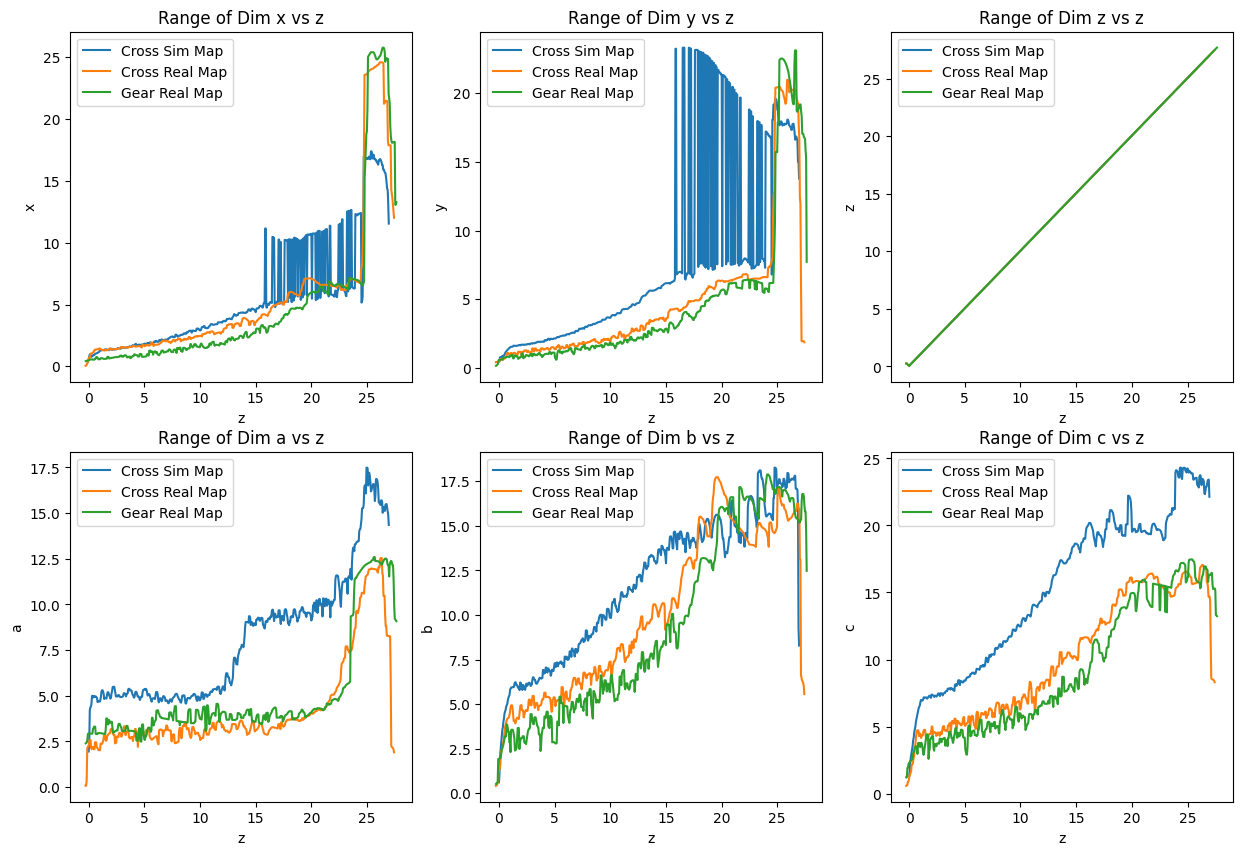

In [13]:
# plot comparison 
labels = ['x','y','z','a','b','c'] 
fig, axs = plt.subplots(2,3,figsize=(15,10))     
for i in range(6):
    row = i//3
    col = i%3
    axs[row,col].plot(np.arange(cross_map_sim_df['z'].min(),cross_map_sim_df['z'].max(),res), cross_sim_xyzabc_range_orig[:,i]) 
    axs[row,col].plot(np.arange(cross_map_real_df['z'].min(),cross_map_real_df['z'].max(),res), cross_real_xyzabc_range_orig[:,i]) 
    axs[row,col].plot(np.arange(gear_map_real_df['z'].min(),gear_map_real_df['z'].max(),res), gear_real_xyzabc_range_orig[:,i])
    axs[row,col].legend(['Cross Sim Map','Cross Real Map','Gear Real Map']) 
    axs[row,col].set_xlabel("z")
    axs[row,col].set_ylabel(f"{labels[i]}") 
    axs[row,col].set_title(f"Range of Dim {labels[i]} vs z") 
plt.show() 